## **Reading and Decoding mini-SEED files from Q8**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import obspy 
from obspy import read
from obspy import UTCDateTime

The Q8s generate mini-SEED files, which are each 4MByte long. The naming convention for these files is for example:

*BK-BK63-20200613151519.330*
             
where BK is the network code, BK63 is the station name and last the time atr which the file was written.

The read command contains wild cards and generates a stream called "st".
As seen in the output, "st" contains many separate mini-SEED traces. The info generated for each trace by the command "st.__str__(extended=True)" is:
tracename (according the SEED convention), begin time - end time of data set, sampling rate, number of samples in trace

In [8]:
st = read("./Q8/*.687*")
print(st.__str__(extended=True))

47 Trace(s) in Stream:
BK.BK63.IN.HNN | 2020-06-22T19:53:31.951270Z - 2020-06-22T20:58:19.591270Z | 100.0 Hz, 388765 samples
BK.BK63.00.HHZ | 2020-06-22T19:53:32.860470Z - 2020-06-22T20:58:19.490470Z | 100.0 Hz, 388664 samples
BK.BK63.00.HHN | 2020-06-22T19:53:32.860470Z - 2020-06-22T20:58:15.530470Z | 100.0 Hz, 388268 samples
BK.BK63.00.HHE | 2020-06-22T19:53:32.860470Z - 2020-06-22T20:58:05.730470Z | 100.0 Hz, 387288 samples
BK.BK63.00.HNZ | 2020-06-22T19:53:32.860470Z - 2020-06-22T20:58:26.220470Z | 100.0 Hz, 389337 samples
BK.BK63.00.HNN | 2020-06-22T19:53:32.860470Z - 2020-06-22T20:58:26.220470Z | 100.0 Hz, 389337 samples
BK.BK63.00.HNE | 2020-06-22T19:53:32.860470Z - 2020-06-22T20:57:24.430470Z | 100.0 Hz, 383158 samples
BK.BK63.00.BHZ | 2020-06-22T19:52:30.654200Z - 2020-06-22T20:57:48.279200Z | 40.0 Hz, 156706 samples
BK.BK63.00.BHN | 2020-06-22T19:52:30.654200Z - 2020-06-22T20:58:17.779200Z | 40.0 Hz, 157886 samples
BK.BK63.00.BHE | 2020-06-22T19:52:30.654200Z - 2020-06-22T20:

** Selecting and Plotting traces **

One can generate a new stream (here "stsel") by selecting any single trace or set of traces. As an example, if I am interested in the mass positions, I would select the three traces VMZ, VMN and VME, if I am interested in the calibration signal input I would select the traces HCA. I can chose them respectively by using wildcards like "*VM*" or "*HC*" in the first line.
The command "tr.stats" return details of the header of each trace.

3 Trace(s) in Stream:
BK.BK63.00.HCA | 2020-06-22T20:32:59.020471Z - 2020-06-22T20:35:59.010471Z | 100.0 Hz, 18000 samples
BK.BK63.00.HCA | 2020-06-22T20:39:59.020470Z - 2020-06-22T20:46:59.010470Z | 100.0 Hz, 42000 samples
BK.BK63.00.HCA | 2020-06-22T20:47:59.020471Z - 2020-06-22T20:56:07.970471Z | 100.0 Hz, 48896 samples
         network: BK
         station: BK63
        location: 00
         channel: HCA
       starttime: 2020-06-22T20:32:59.020471Z
         endtime: 2020-06-22T20:35:59.010471Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 18000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 8, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 4096000})

         network: BK
         station: BK63
        location: 00
         channel: HCA
       starttime: 2020-06-22T20:39:59.020470Z
         endtime: 2020-06-22T20:46:59.010470Z
   sampling_rate: 100.0
           delta

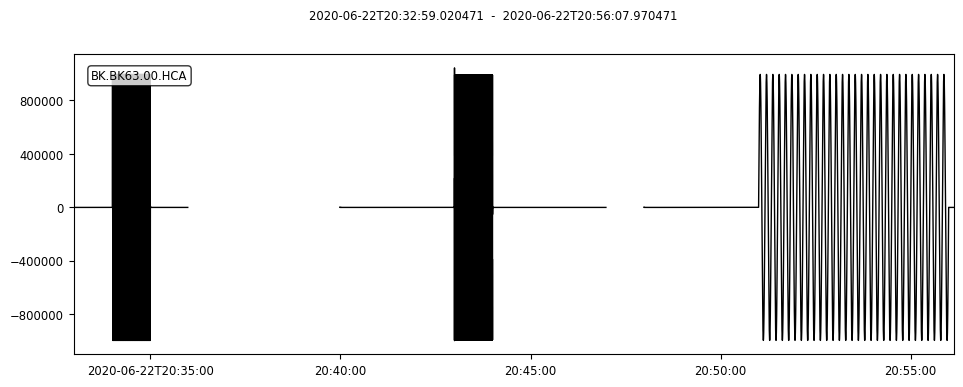

In [9]:
stsel=st.select(id="*HC*")
print(stsel)
tr=stsel [0]
tr1=stsel[1]
tr2=stsel[2]
print (tr.stats)
print()
print (tr1.stats)
print (tr2.stats)


#create overview plot full length of file
stsel.plot(color='black',size=(1000,400),equal_scale=True)

In [10]:
bitw=5*10**-6
for i in range (3):
    tr=stsel[i]
    n=tr.stats.npts
    m=tr.max()
    V=m*bitw
    print (i,n,m,V)


0 18000 -998886 -4.9944299999999995
1 42000 1044146 5.22073
2 48896 -998372 -4.99186


2020-06-22T20:47:59.020471Z 2020-06-22T20:56:07.970471Z
************************


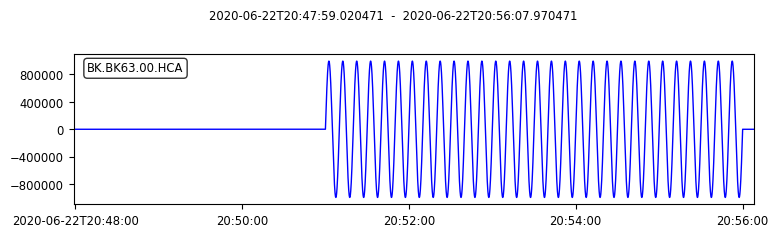

2020-06-22T20:47:59.020471Z 2020-06-22T20:50:59.020471Z 2020-06-22T20:55:59.020471Z
BK.BK63.00.HCA | 2020-06-22T20:50:59.020471Z - 2020-06-22T20:55:59.020471Z | 100.0 Hz, 30001 samples
         network: BK
         station: BK63
        location: 00
         channel: HCA
       starttime: 2020-06-22T20:50:59.020471Z
         endtime: 2020-06-22T20:55:59.020471Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 30001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 19, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 4096000})
      processing: ['ObsPy 1.1.0: trim(endtime=UTCDateTime(2020, 6, 22, 20, 55, 59, 20471)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2020, 6, 22, 20, 50, 59, 20471))']
**
**
2020-06-22T20:50:59.020471Z 2020-06-22T20:50:59.020471Z
2020-06-22T20:55:59.020471Z 2020-06-22T20:55:59.020471Z


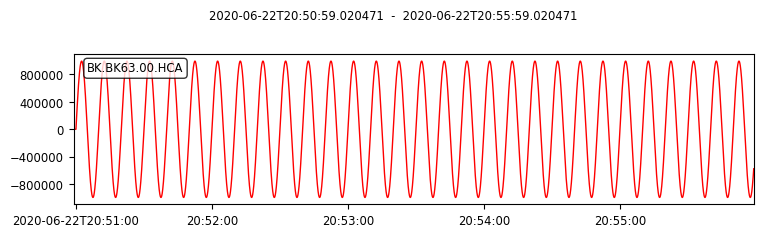

In [11]:
#create plot and slice of data for first event ev1
#plot and slice window ('begin' to 'end') has to be given in seconds from startime dt
#filter and integrate

dt=stsel[2].stats.starttime
tend=stsel[2].stats.endtime
print (dt,tend)

print("************************")
stsel[2].plot(color='blue')


begin=dt+180
end=begin+300
print (dt, begin, end)
calpulse = stsel[2].slice(starttime=dt+180, endtime=end)
print (calpulse)
print (calpulse.stats)
print ("**")
print ("**")
startpulse=calpulse.stats.starttime
endpulse=calpulse.stats.endtime
print (startpulse,begin)
print(endpulse,end)
calpulse.plot(color= "red")

3 Trace(s) in Stream:
BK.BK63.00.HHZ | 2020-06-22T19:53:32.860470Z - 2020-06-22T20:58:19.490470Z | 100.0 Hz, 388664 samples
BK.BK63.00.HHN | 2020-06-22T19:53:32.860470Z - 2020-06-22T20:58:15.530470Z | 100.0 Hz, 388268 samples
BK.BK63.00.HHE | 2020-06-22T19:53:32.860470Z - 2020-06-22T20:58:05.730470Z | 100.0 Hz, 387288 samples
         network: BK
         station: BK63
        location: 00
         channel: HHZ
       starttime: 2020-06-22T19:53:32.860470Z
         endtime: 2020-06-22T20:58:19.490470Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 388664
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 124, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 4096000})

         network: BK
         station: BK63
        location: 00
         channel: HHN
       starttime: 2020-06-22T19:53:32.860470Z
         endtime: 2020-06-22T20:58:15.530470Z
   sampling_rate: 100.0
          

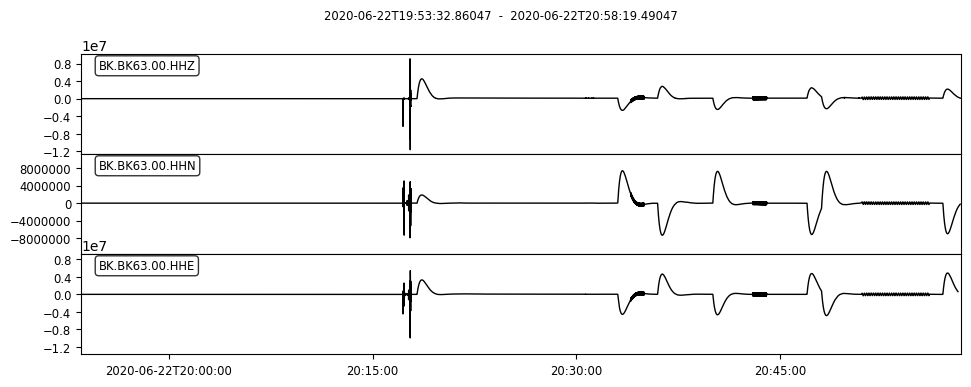

In [12]:
stsel=st.select(id="*HH*")
print(stsel)
tr=stsel [0]
tr1=stsel[1]
tr2=stsel[2]
print (tr.stats)
print()
print (tr1.stats)
print (tr2.stats)


#create overview plot full length of file
stsel.plot(color='black',size=(1000,400),equal_scale=True)

3 Trace(s) in Stream:
BK.BK63.00.HHZ | 2020-06-22T20:50:59.020470Z - 2020-06-22T20:55:59.020470Z | 100.0 Hz, 30001 samples
BK.BK63.00.HHN | 2020-06-22T20:50:59.020470Z - 2020-06-22T20:55:59.020470Z | 100.0 Hz, 30001 samples
BK.BK63.00.HHE | 2020-06-22T20:50:59.020470Z - 2020-06-22T20:55:59.020470Z | 100.0 Hz, 30001 samples
**
**


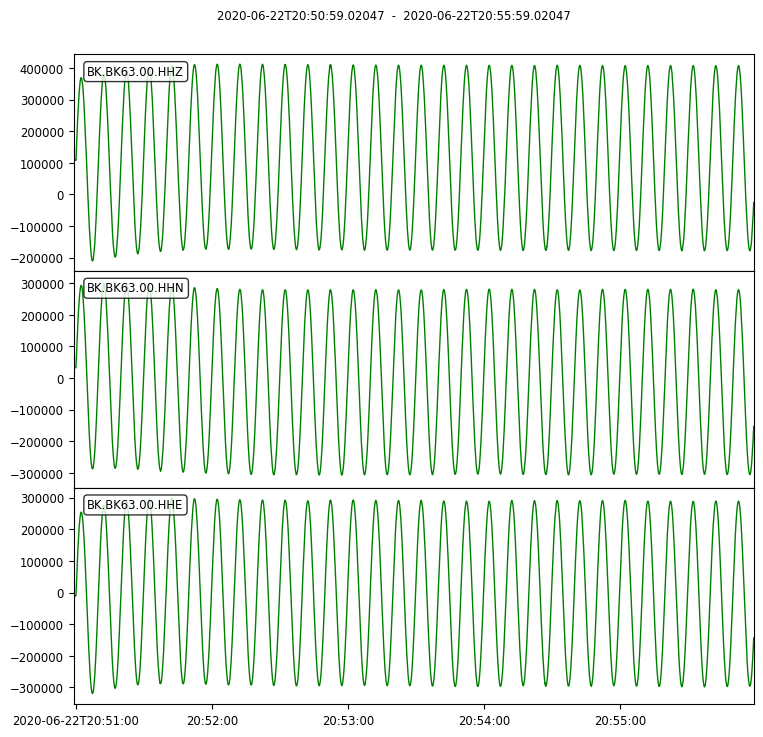

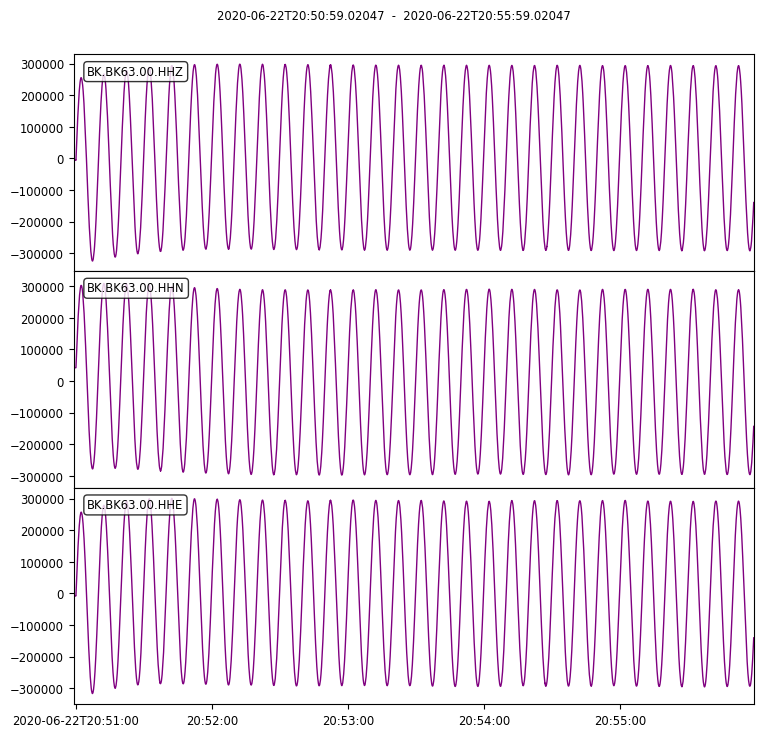

In [13]:
calresponse = stsel.slice(startpulse, endpulse)
print (calresponse)

print ("**")
print ("**")
calresponse.plot(color= "green")
calresponse.detrend('demean')
calresponse.plot(color= "purple")

30001 30001


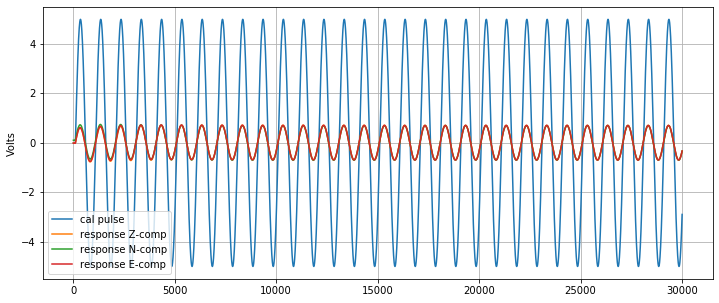

In [31]:
numpts=calresponse[0].stats.npts
print(calresponse[0].stats.npts, numpts)
responseZ=np.zeros(calresponse[0].stats.npts)
responseN=np.zeros(calresponse[0].stats.npts)
responseE=np.zeros(calresponse[0].stats.npts)
pulse=np.zeros(calresponse[0].stats.npts)
t=np.zeros(calresponse[0].stats.npts)

responseZ=calresponse[0].data*2.3890*10**-6
responseN=calresponse[1].data*2.3890*10**-6
responseE=calresponse[2].data*2.3890*10**-6
pulse=calpulse.data*5*10**-6


for i in range (calresponse[0].stats.npts):
    t[i]=i
    
plt.rcParams['figure.figsize'] = [12, 5]
plt.plot (t,pulse,label="cal pulse")
plt.plot (t,responseZ,label="response Z-comp")
plt.plot (t,responseN,label="response N-comp")
plt.plot (t,responseE,label="response E-comp")
plt.ylabel('Volts')
plt.grid()
plt.legend()
plt.show()

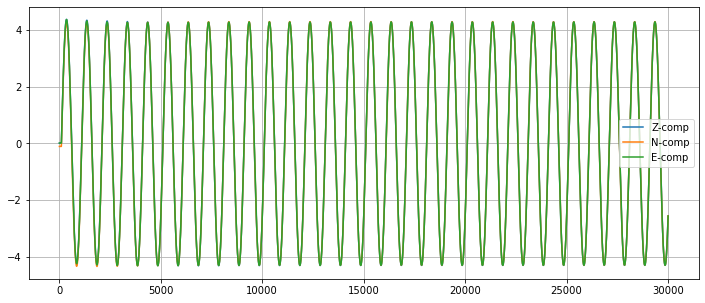

In [33]:
zdiff=np.zeros(numpts)
ndiff=np.zeros(numpts)
ediff=np.zeros(numpts)
zavg=0
for i in range (numpts):
    zdiff[i]=pulse[i]-responseZ[i]
    ndiff[i]=pulse[i]-responseN[i]
    ediff[i]=pulse[i]-responseE[i]
    #rz=responseZ[i]*10**-5
    #zavg=rz+zavg
    #print (pulse[i],responseZ[i]*750)

plt.rcParams['figure.figsize'] = [12, 5]
plt.plot (t,zdiff,label="Z-comp")
plt.plot (t,ndiff,label="N-comp")
plt.plot (t,ediff,label="E-comp")
#plt.ylabel('Volts')
plt.grid()
plt.legend()
plt.show()